<a href="https://colab.research.google.com/github/sriman21/sriman21-Credit-Risk-Analysis/blob/main/Credit_Risk_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Upload Dataset

In [69]:
from google.colab import files
uploaded = files.upload()


Saving credit_customers.csv to credit_customers (1).csv


Import Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset

In [71]:
df = pd.read_csv('credit_customers.csv')


In [72]:
df.head()

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,<0,6.0,critical/other existing credit,radio/tv,1169.0,no known savings,>=7,4.0,male single,none,...,real estate,67.0,none,own,2.0,skilled,1.0,yes,yes,good
1,0<=X<200,48.0,existing paid,radio/tv,5951.0,<100,1<=X<4,2.0,female div/dep/mar,none,...,real estate,22.0,none,own,1.0,skilled,1.0,none,yes,bad
2,no checking,12.0,critical/other existing credit,education,2096.0,<100,4<=X<7,2.0,male single,none,...,real estate,49.0,none,own,1.0,unskilled resident,2.0,none,yes,good
3,<0,42.0,existing paid,furniture/equipment,7882.0,<100,4<=X<7,2.0,male single,guarantor,...,life insurance,45.0,none,for free,1.0,skilled,2.0,none,yes,good
4,<0,24.0,delayed previously,new car,4870.0,<100,1<=X<4,3.0,male single,none,...,no known property,53.0,none,for free,2.0,skilled,2.0,none,yes,bad


In [73]:
print(df.shape)

(1000, 21)


In [74]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   checking_status         1000 non-null   object 
 1   duration                1000 non-null   float64
 2   credit_history          1000 non-null   object 
 3   purpose                 1000 non-null   object 
 4   credit_amount           1000 non-null   float64
 5   savings_status          1000 non-null   object 
 6   employment              1000 non-null   object 
 7   installment_commitment  1000 non-null   float64
 8   personal_status         1000 non-null   object 
 9   other_parties           1000 non-null   object 
 10  residence_since         1000 non-null   float64
 11  property_magnitude      1000 non-null   object 
 12  age                     1000 non-null   float64
 13  other_payment_plans     1000 non-null   object 
 14  housing                 1000 non-null   o

Check for null values

In [75]:
print(df.isnull().sum())

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64


In [76]:
print(df.duplicated().sum())

0


In [77]:
df['class'].value_counts()

,count
class,
good,700
bad,300


In [78]:
print(df['class'].value_counts(normalize=True) * 100)

class
good    70.0
bad     30.0
Name: proportion, dtype: float64


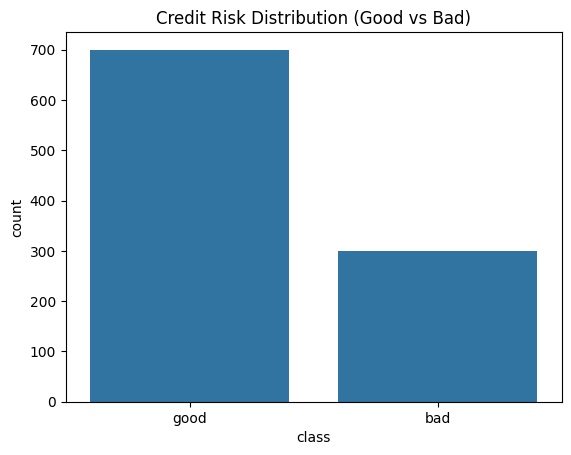

In [79]:
sns.countplot(x='class', data=df)
plt.title('Credit Risk Distribution (Good vs Bad)')
plt.show()

Age vs Credit Risk:

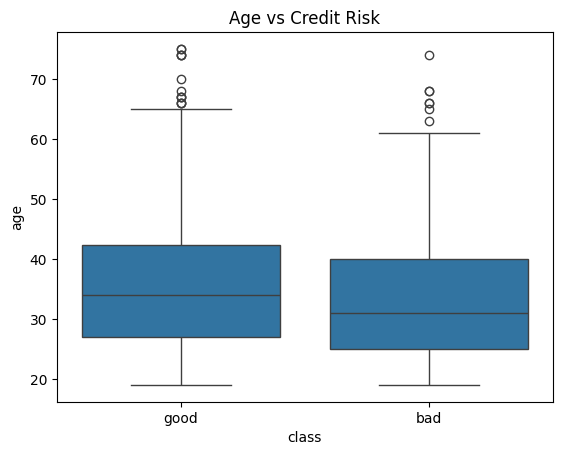

In [80]:
sns.boxplot(x='class', y='age', data=df)
plt.title('Age vs Credit Risk')
plt.show()

Credit Amount vs Risk

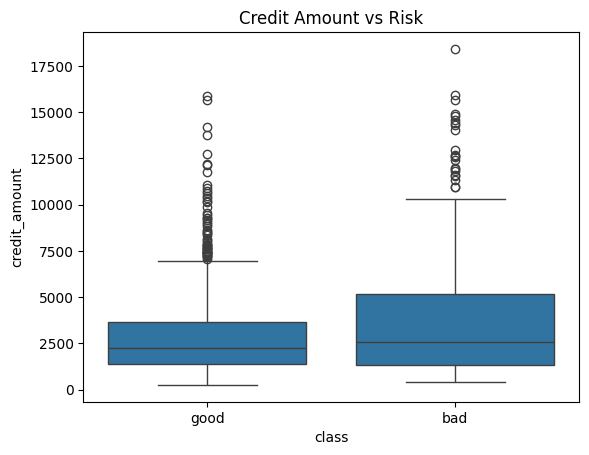

In [81]:
sns.boxplot(x='class', y='credit_amount', data=df)
plt.title('Credit Amount vs Risk')
plt.show()

Purpose vs Risk:

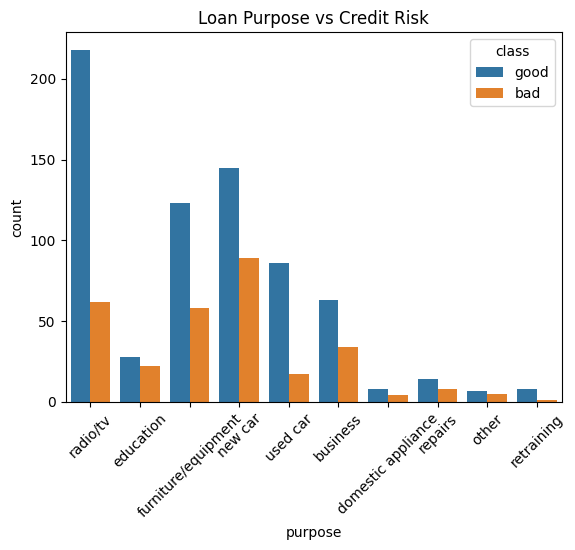

In [82]:
sns.countplot(x='purpose', hue='class', data=df)
plt.title('Loan Purpose vs Credit Risk')
plt.xticks(rotation=45)
plt.show()

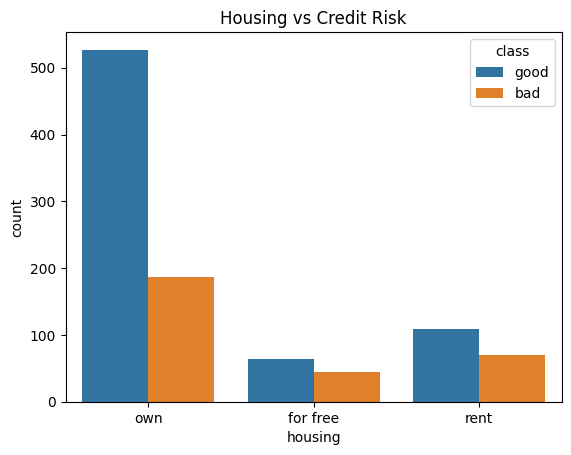

In [83]:
sns.countplot(x='housing', hue='class', data=df)
plt.title('Housing vs Credit Risk')
plt.show()

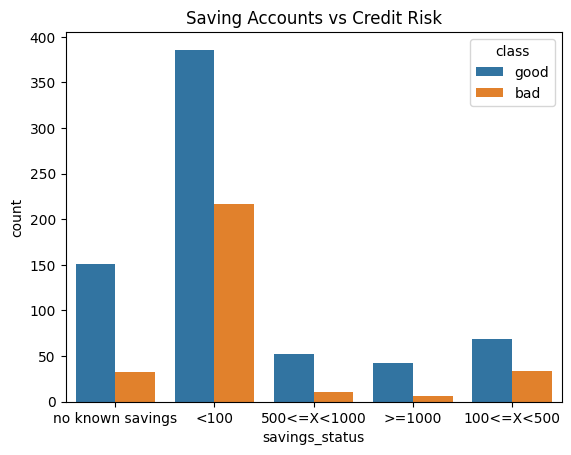

In [84]:
sns.countplot(x='savings_status', hue='class', data=df)
plt.title('Saving Accounts vs Credit Risk')
plt.show()

Correlation Heatmap

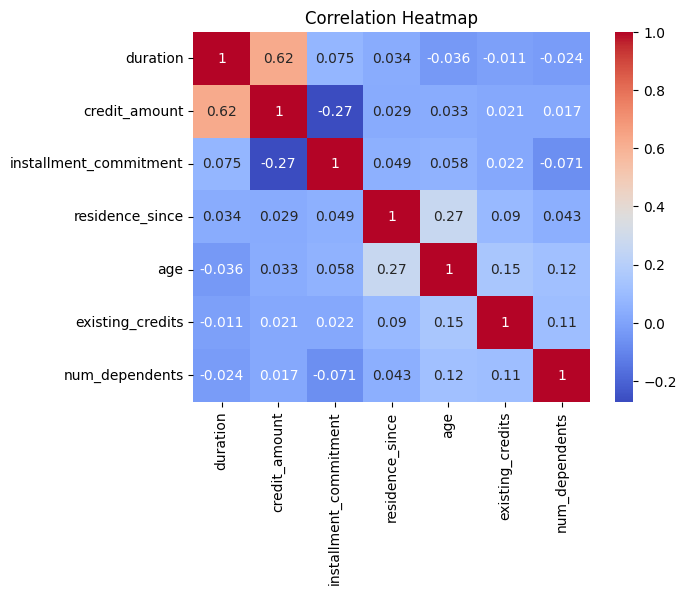

In [85]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Feature Engineering

Target Encode

In [86]:
df['class'] = df['class'].map({'good': 0, 'bad': 1})

 New Features

In [87]:
# 1. Credit Amount per Duration (Monthly Burden)
df['monthly_burden'] = df['credit_amount'] / df['duration']

# 2. Age Groups
df['age_group'] = pd.cut(df['age'],
                          bins=[0, 25, 35, 50, 100],
                          labels=['Young', 'Adult', 'Middle-aged', 'Senior'])

# 3. Credit to Age Ratio
df['credit_per_age'] = df['credit_amount'] / df['age']

# 4. High Credit Flag
df['high_credit'] = (df['credit_amount'] > df['credit_amount'].median()).astype(int)

# 5. Long Duration Flag
df['long_duration'] = (df['duration'] > df['duration'].median()).astype(int)

print("New features created!")
print(df[['monthly_burden', 'age_group', 'credit_per_age', 'high_credit', 'long_duration']].head())

New features created!
   monthly_burden    age_group  credit_per_age  high_credit  long_duration
0      194.833333       Senior       17.447761            0              0
1      123.979167        Young      270.500000            1              1
2      174.666667  Middle-aged       42.775510            0              0
3      187.666667  Middle-aged      175.155556            1              1
4      202.916667       Senior       91.886792            1              1


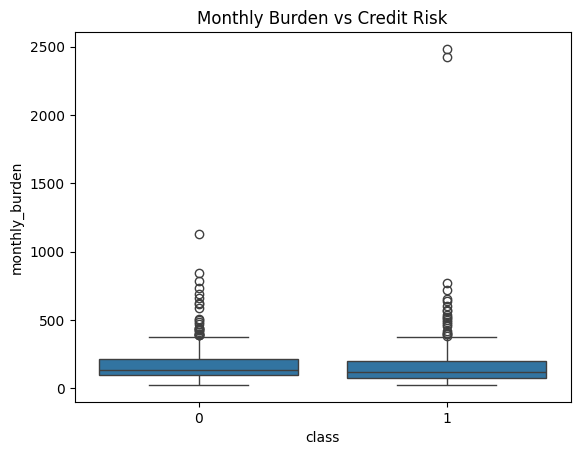

In [88]:
sns.boxplot(x='class', y='monthly_burden', data=df)
plt.title('Monthly Burden vs Credit Risk')
plt.show()

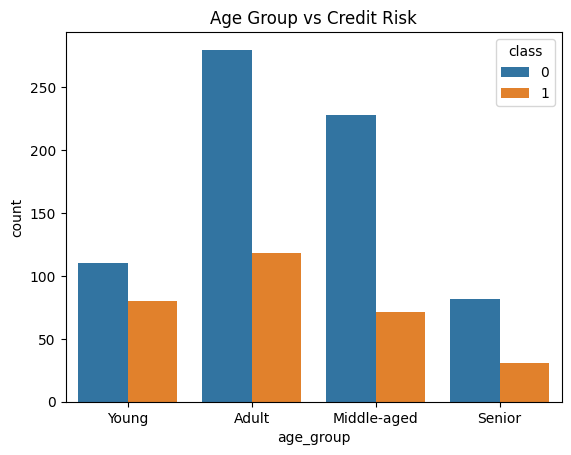

In [89]:
sns.countplot(x='age_group', hue='class', data=df)
plt.title('Age Group vs Credit Risk')
plt.show()


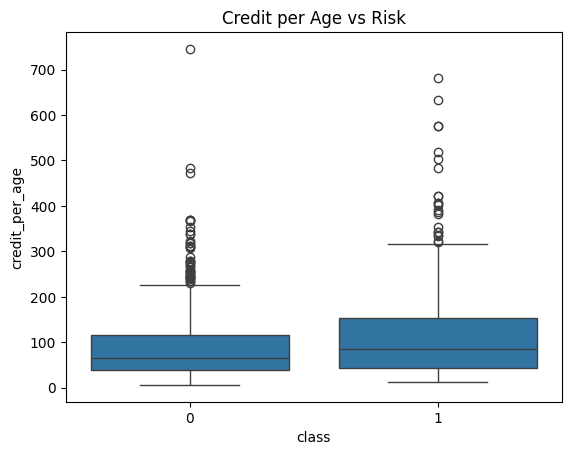

In [90]:
sns.boxplot(x='class', y='credit_per_age', data=df)
plt.title('Credit per Age vs Risk')
plt.show()

Preprocessing

In [91]:
df.drop('age_group', axis=1, inplace=True)

Label Encoding

In [92]:
from sklearn.preprocessing import LabelEncoder

encoders = {} # Initialize an empty dictionary to store encoders

cat_cols = ['housing', 'savings_status',
            'checking_status', 'purpose', 'personal_status',
            'credit_history', 'employment', 'other_parties',
            'property_magnitude', 'other_payment_plans', 'job',
            'own_telephone', 'foreign_worker']

for col in cat_cols:
    le = LabelEncoder() # Create a new LabelEncoder for each column
    df[col] = le.fit_transform(df[col])
    encoders[col] = le # Store the fitted encoder in the dictionary

print("Encoding done!")
print(df.head())

Encoding done!
   checking_status  duration  credit_history  purpose  credit_amount  \
0                1       6.0               1        6         1169.0   
1                0      48.0               3        6         5951.0   
2                3      12.0               1        2         2096.0   
3                1      42.0               3        3         7882.0   
4                1      24.0               2        4         4870.0   

   savings_status  employment  installment_commitment  personal_status  \
0               4           3                     4.0                3   
1               2           0                     2.0                0   
2               2           1                     2.0                3   
3               2           1                     2.0                3   
4               2           0                     3.0                3   

   other_parties  ...  existing_credits  job  num_dependents  own_telephone  \
0              2  ...       

Feature Scaling:

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scale_cols = ['age', 'credit_amount', 'duration',
              'monthly_burden', 'credit_per_age']

df[scale_cols] = scaler.fit_transform(df[scale_cols])

print("Scaling done!")

Scaling done!


 Train Test Split + SMOTE

In [94]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: class
0    560
1    240
Name: count, dtype: int64
After SMOTE: class
1    560
0    560
Name: count, dtype: int64


Logistic Regression (Baseline)

In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score

lr = LogisticRegression(random_state=42)
lr.fit(X_train_res, y_train_res)

y_pred_lr = lr.predict(X_test)

print("Logistic Regression:")
print(classification_report(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

Logistic Regression:
              precision    recall  f1-score   support

           0       0.82      0.75      0.78       140
           1       0.51      0.62      0.56        60

    accuracy                           0.71       200
   macro avg       0.67      0.68      0.67       200
weighted avg       0.73      0.71      0.72       200

ROC-AUC: 0.7547619047619047


Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_res, y_train_res)

y_pred_rf = rf.predict(X_test)

print("Random Forest:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81       140
           1       0.56      0.52      0.54        60

    accuracy                           0.73       200
   macro avg       0.68      0.67      0.68       200
weighted avg       0.73      0.74      0.73       200

ROC-AUC: 0.7879761904761905


XGBoost

In [97]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42, eval_metric='logloss')
xgb.fit(X_train_res, y_train_res)

y_pred_xgb = xgb.predict(X_test)

print("XGBoost:")
print(classification_report(y_test, y_pred_xgb))
print("ROC-AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

XGBoost:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       140
           1       0.55      0.55      0.55        60

    accuracy                           0.73       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.73      0.73      0.73       200

ROC-AUC: 0.7926190476190477


 Model Comparison

                 Model   ROC-AUC
0  Logistic Regression  0.754762
1        Random Forest  0.787976
2              XGBoost  0.792619


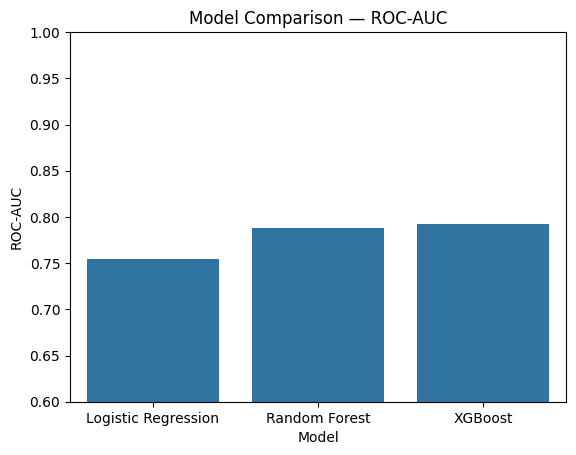

In [98]:
results = {
    'Model': ['Logistic Regression', 'Random Forest', 'XGBoost'],
    'ROC-AUC': [
        roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]),
        roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1])
    ]
}

results_df = pd.DataFrame(results)
print(results_df)

sns.barplot(x='Model', y='ROC-AUC', data=results_df)
plt.title('Model Comparison — ROC-AUC')
plt.ylim(0.6, 1.0)
plt.show()

Confusion Matrix

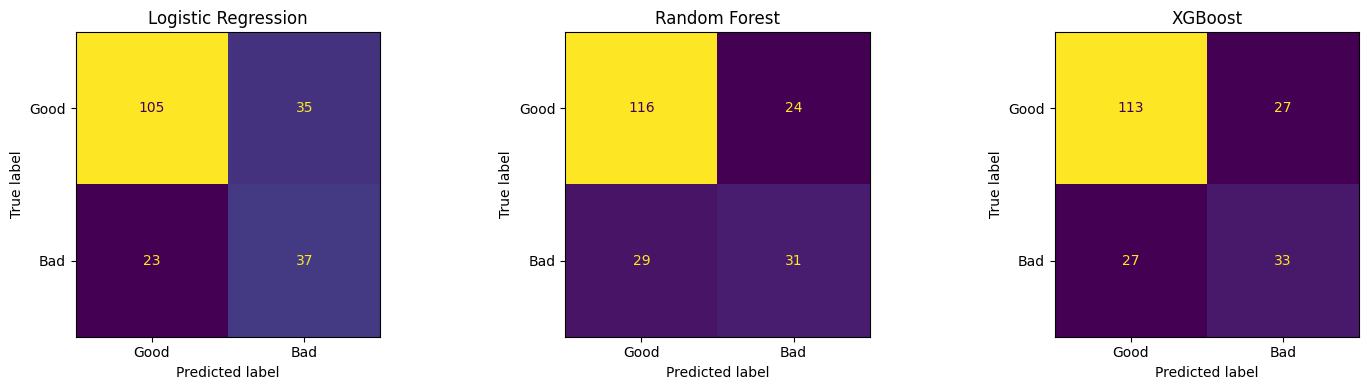

In [99]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

models_dict = {
    'Logistic Regression': y_pred_lr,
    'Random Forest': y_pred_rf,
    'XGBoost': y_pred_xgb
}

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for ax, (name, preds) in zip(axes, models_dict.items()):
    cm = confusion_matrix(y_test, preds)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Good', 'Bad'])
    disp.plot(ax=ax, colorbar=False)
    ax.set_title(name)

plt.tight_layout()
plt.show()

ROC Curve

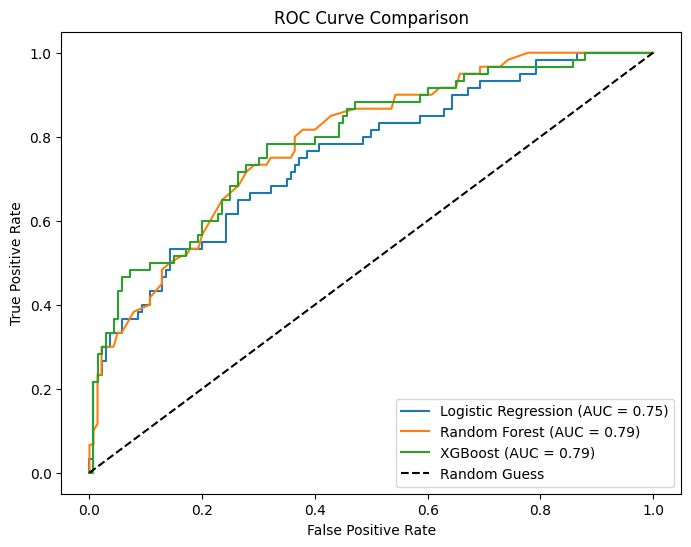

In [100]:
from sklearn.metrics import roc_curve, auc

plt.figure(figsize=(8, 6))

for name, model in [('Logistic Regression', lr),
                     ('Random Forest', rf),
                     ('XGBoost', xgb)]:
    fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:,1])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0,1], [0,1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

 Cost Sensitive Analysis

In [101]:
from sklearn.metrics import confusion_matrix

for name, preds in models_dict.items():
    cm = confusion_matrix(y_test, preds)
    false_negatives = cm[1][0]
    print(f"{name} — False Negatives (Missed Bad Customers): {false_negatives}")

Logistic Regression — False Negatives (Missed Bad Customers): 23
Random Forest — False Negatives (Missed Bad Customers): 29
XGBoost — False Negatives (Missed Bad Customers): 27


In [102]:
# Default threshold 0.5 — danni tаggistam
y_prob_xgb = xgb.predict_proba(X_test)[:,1]

# Threshold 0.3 ki tаggistam — model more sensitive avutundi bad customers ki
threshold = 0.3
y_pred_xgb_tuned = (y_prob_xgb >= threshold).astype(int)

cm = confusion_matrix(y_test, y_pred_xgb_tuned)
false_negatives = cm[1][0]
print(f"XGBoost Tuned — False Negatives: {false_negatives}")
print(classification_report(y_test, y_pred_xgb_tuned))

XGBoost Tuned — False Negatives: 17
              precision    recall  f1-score   support

           0       0.86      0.74      0.79       140
           1       0.54      0.72      0.61        60

    accuracy                           0.73       200
   macro avg       0.70      0.73      0.70       200
weighted avg       0.76      0.73      0.74       200



In [103]:
print("Before vs After Comparison:")
print(f"XGBoost Original — False Negatives: 27")
print(f"XGBoost Improved — False Negatives: {false_negatives}")

if false_negatives < 27:
    print("✅ Improvement achieved!")
elif false_negatives <= 23:
    print("🏆 Logistic Regression ni beat chesamu!")

Before vs After Comparison:
XGBoost Original — False Negatives: 27
XGBoost Improved — False Negatives: 17
✅ Improvement achieved!


SHAP For XGBoost

In [104]:
import shap

explainer = shap.TreeExplainer(xgb_improved)
shap_values = explainer.shap_values(X_test)

 Summary Bar Plot

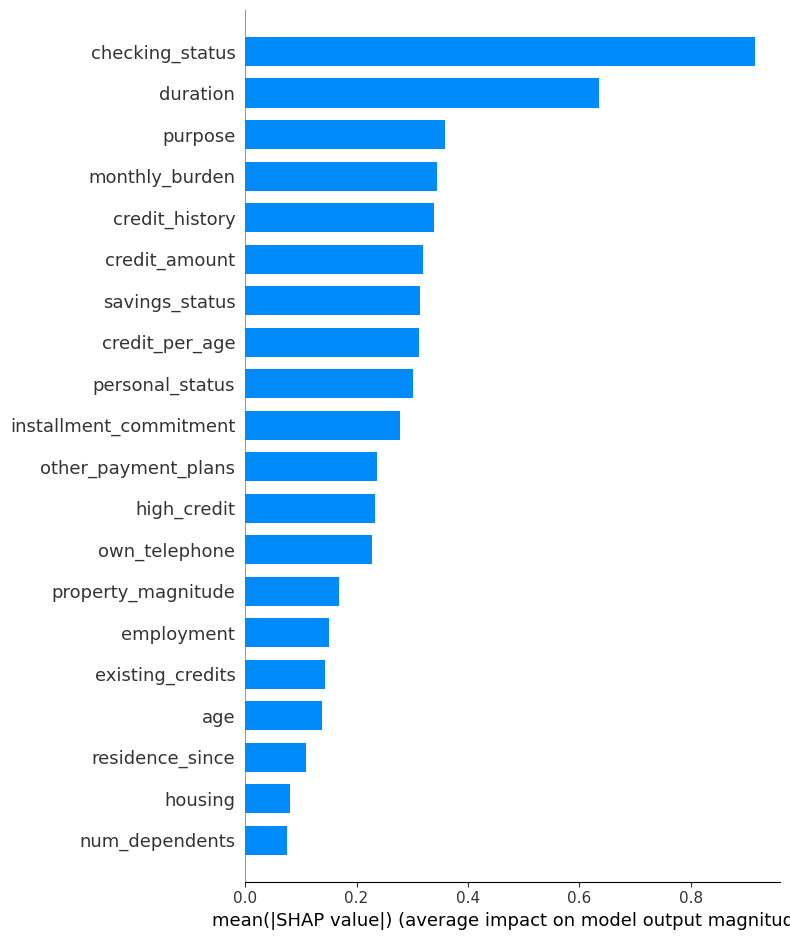

In [105]:
shap.summary_plot(shap_values, X_test, plot_type="bar")

Beeswarm Plot:

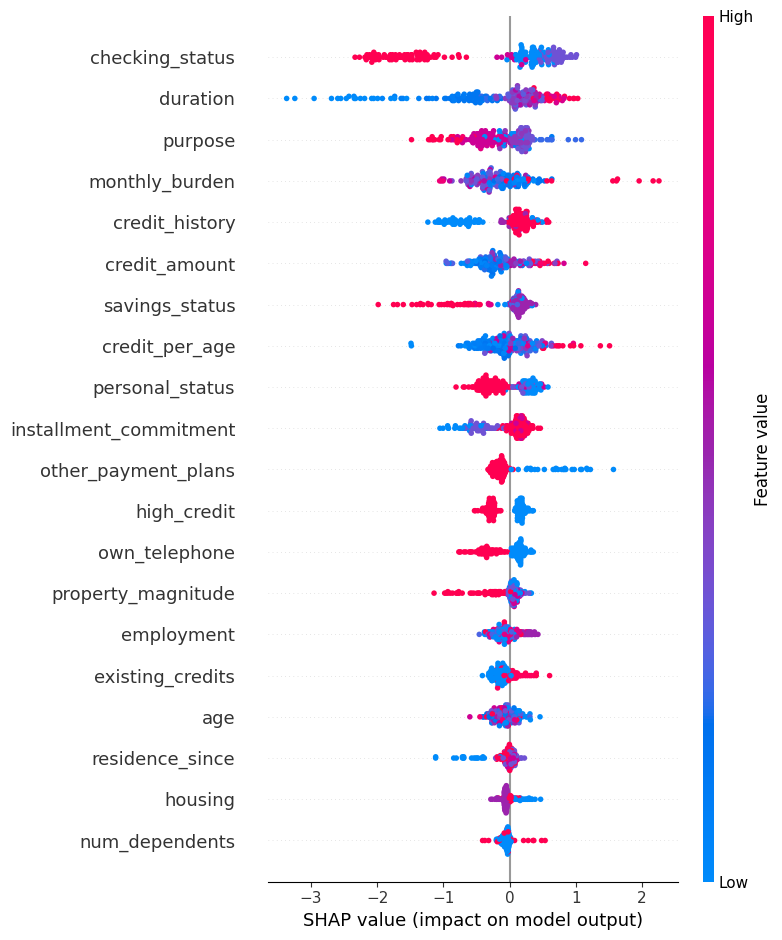

In [106]:
shap.summary_plot(shap_values, X_test)

Waterfall Plot (Single Customer):

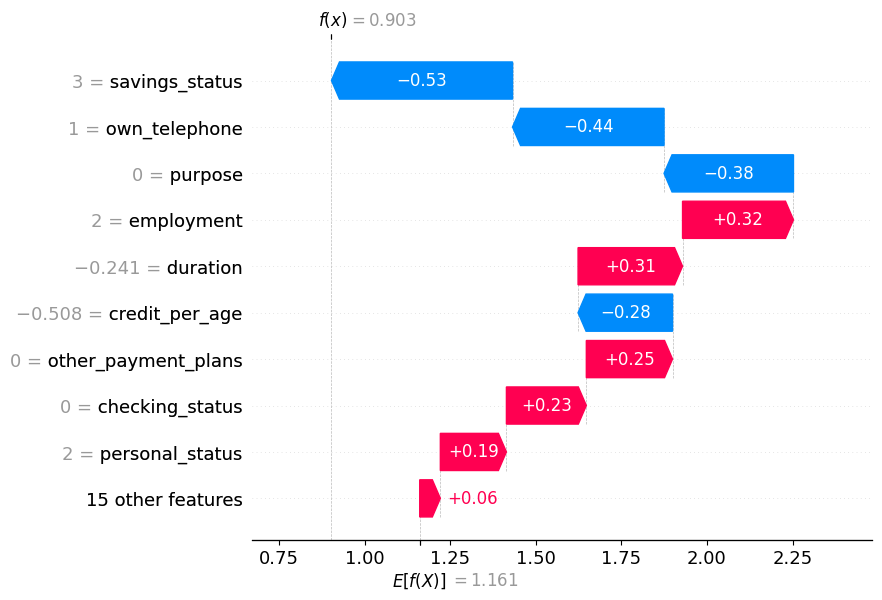

In [107]:
shap.plots.waterfall(shap.Explanation(
    values=shap_values[0],
    base_values=explainer.expected_value,
    data=X_test.iloc[0],
    feature_names=X_test.columns.tolist()
))

In [108]:
shap.initjs()
shap.force_plot(
    explainer.expected_value,
    shap_values[0],
    X_test.iloc[0],
    feature_names=X_test.columns.tolist()
)

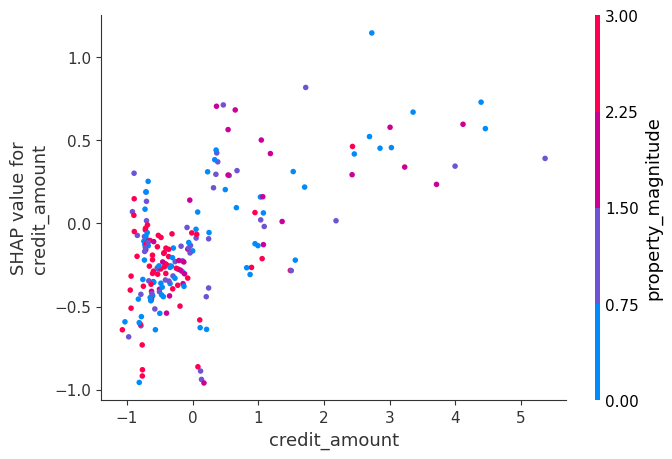

In [109]:
# Credit amount vs SHAP values
shap.dependence_plot('credit_amount', shap_values, X_test)

New Customer Predict

In [110]:
def predict_customer(
    checking_status,      # 'no checking', '<0', '0<=X<200', '>=200'
    duration,             # months (number)
    credit_history,       # 'no credits', 'all paid', 'existing paid',
                          # 'delayed previously', 'critical/other existing credit'
    purpose,              # 'car','furniture/equipment','radio/TV',
                          # 'education','business','new car','used car'
    credit_amount,        # loan amount (number)
    savings_status,       # 'no known savings','<100','100<=X<500',
                          # '500<=X<1000','>=1000'
    employment,           # 'unemployed','<1','1<=X<4','4<=X<7','>=7'
    installment_commitment, # 1-4 (number)
    personal_status,      # 'male single','female div/dep/mar',
                          # 'male div/sep','male mar/wid'
    other_parties,        # 'none','co applicant','guarantor'
    residence_since,      # 1-4 (number)
    property_magnitude,   # 'real estate','life insurance',
                          # 'car','no known property'
    age,                  # number
    other_payment_plans,  # 'none','bank','stores'
    housing,              # 'own','free','rent'
    existing_credits,     # 1-4 (number)
    job,                  # 'unskilled resident','unskilled non-res',
                          # 'skilled','high qualif/self emp/mgmt'
    num_dependents,       # 1-2 (number)
    own_telephone,        # 'none','yes'
    foreign_worker        # 'yes','no'
):
    customer = {
        'checking_status': checking_status,
        'duration': duration,
        'credit_history': credit_history,
        'purpose': purpose,
        'credit_amount': credit_amount,
        'savings_status': savings_status,
        'employment': employment,
        'installment_commitment': installment_commitment,
        'personal_status': personal_status,
        'other_parties': other_parties,
        'residence_since': residence_since,
        'property_magnitude': property_magnitude,
        'age': age,
        'other_payment_plans': other_payment_plans,
        'housing': housing,
        'existing_credits': existing_credits,
        'job': job,
        'num_dependents': num_dependents,
        'own_telephone': own_telephone,
        'foreign_worker': foreign_worker
    }

    df_new = pd.DataFrame([customer])

    # Feature Engineering
    df_new['monthly_burden'] = df_new['credit_amount'] / df_new['duration']
    df_new['credit_per_age'] = df_new['credit_amount'] / df_new['age']
    # Using hardcoded medians as they were in the original notebook code
    # For robust production, these medians should be stored from training data
    df_new['high_credit'] = (df_new['credit_amount'] > 2500).astype(int)
    df_new['long_duration'] = (df_new['duration'] > 18).astype(int)

    # Encoding
    cat_cols = ['housing', 'savings_status', 'checking_status', 'purpose',
                'personal_status', 'credit_history', 'employment',
                'other_parties', 'property_magnitude', 'other_payment_plans',
                'job', 'own_telephone', 'foreign_worker']

    for col in cat_cols:
        df_new[col] = encoders[col].transform(df_new[col])

    # Scaling
    scale_cols = ['age', 'credit_amount', 'duration',
                  'monthly_burden', 'credit_per_age']
    df_new[scale_cols] = scaler.transform(df_new[scale_cols])

    # Correct column order
    df_new = df_new[X.columns]

    # Predict
    prob = xgb.predict_proba(df_new)[:,1][0] # Corrected from xgb_improved to xgb

    if prob >= 0.3:
        decision = "❌ LOAN REJECT — High Default Risk!"
        risk_level = "HIGH RISK"
    else:
        decision = "✅ LOAN APPROVE — Low Default Risk!"
        risk_level = "LOW RISK"

    print("=" * 45)
    print("🏦 BANK LOAN DECISION SYSTEM")
    print("=" * 45)
    print(f"Customer Age           : {age}")
    print(f"Credit Amount          : ₹{credit_amount:,}")
    print(f"Duration               : {duration} months")
    print(f"Monthly Burden         : ₹{credit_amount/duration:,.0f}/month")
    print("-" * 45)
    print(f"Default Probability    : {prob:.1%}")
    print(f"Risk Level             : {risk_level}")
    print(f"Decision               : {decision}")
    print("=" * 45)

# Test
predict_customer(
    checking_status='>=200',
    duration=12,
    credit_history='existing paid',
    purpose='education',
    credit_amount=2000,
    savings_status='>=1000',
    employment='>=7',
    installment_commitment=2,
    personal_status='female div/dep/mar',
    other_parties='none',
    residence_since=4,
    property_magnitude='real estate',
    age=52,
    other_payment_plans='none',
    housing='own',
    existing_credits=1,
    job='skilled',
    num_dependents=1,
    own_telephone='yes',
    foreign_worker='yes'
)

🏦 BANK LOAN DECISION SYSTEM
Customer Age           : 52
Credit Amount          : ₹2,000
Duration               : 12 months
Monthly Burden         : ₹167/month
---------------------------------------------
Default Probability    : 11.1%
Risk Level             : LOW RISK
Decision               : ✅ LOAN APPROVE — Low Default Risk!
